In [1]:
# To load few cdf files for a simple analysis of the data
# from cdflib import CDF

# cdf = CDF("C:\\Users\\ANGSHUMOY\\Downloads\\BAHack\\swis_2025Jun23T182245083\\AL1_ASW91_L2_BLK_20240507_UNP_9999_999999_V02.cdf")
# print("Variables in file:")
# print(cdf)

# For Multiple CSV Files and Big Data

import os
from cdflib import CDF, cdfepoch
import numpy as np
import pandas as pd

folder = "C:\\Users\\ANGSHUMOY\\Downloads\\B_A_Hackathon For GitHub\\swis_2025Jun28T071114530"
all_cdf_files = [f for f in os.listdir(folder) if f.endswith(".cdf") and "BLK" in f and "L2" in f]

all_dfs = []

for file in all_cdf_files:
    file_path = os.path.join(folder, file)
    try:
        cdf = CDF(file_path)
        time_raw = cdf['epoch_for_cdf_mod'][:]
        time = np.array([cdfepoch.to_datetime(t) for t in time_raw]).flatten()
        
        df = pd.DataFrame({
            'time': time,
            'density': cdf['proton_density'][:].flatten(),
            'speed': cdf['proton_bulk_speed'][:].flatten(),
            'thermal': cdf['proton_thermal'][:].flatten()
        })
        
        df.replace(-1.0e31, np.nan, inplace=True)
        df.dropna(inplace=True)
        
        all_dfs.append(df)
        
        print(f"Processed {file}")

    except Exception as e:
        print(f"Failed to process {file}: {e}")

# Combine all files into one CSV
combined_df = pd.concat(all_dfs)
combined_df = combined_df.sort_values('time')
combined_df.to_csv("swis_combined_all_days.csv", index=False)


Processed AL1_ASW91_L2_BLK_20250228_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250301_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250302_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250303_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250304_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250306_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250307_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250308_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250309_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250310_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250311_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250312_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250313_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250314_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250315_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250316_UNP_9999_999999_V02.cdf
Processed AL1_ASW91_L2_BLK_20250318_UNP_

In [3]:
# To know all the available variables for furthur analysis
# Show info about the CDF file
info = cdf.cdf_info()
print("\nBasic Info:")
print(info)

# Show all variables available
print("\nAvailable Variables in CDF:")
print(info.zVariables)

# Once we get the variables, we will select the ones which are important for us



Basic Info:
CDFInfo(CDF=WindowsPath('C:/Users/ANGSHU~1/AppData/Local/Temp/tmpok1gmjda.cdf'), Version='3.9.0', Encoding=6, Majority='Column_major', rVariables=[], zVariables=['epoch_for_cdf_mod', 'proton_density', 'numden_p_uncer', 'proton_bulk_speed', 'bulk_p_uncer', 'proton_xvelocity', 'proton_yvelocity', 'proton_zvelocity', 'proton_thermal', 'thermal_p_uncer', 'alpha_density', 'numden_a_uncer', 'alpha_bulk_speed', 'bulk_a_uncer', 'alpha_thermal', 'thermal_a_uncer', 'spacecraft_xpos', 'spacecraft_ypos', 'spacecraft_zpos'], Attributes=[{'TITLE': 'Global'}, {'FIELDNAME': 'Variable'}, {'UNITS': 'Variable'}, {'CATDESC': 'Variable'}, {'DEPEND_0': 'Variable'}, {'DEPEND_1': 'Variable'}, {'DEPEND_2': 'Variable'}, {'DISPLAY_TYPE': 'Variable'}, {'FILLVAL': 'Variable'}, {'FORMAT': 'Variable'}, {'LABLAXIS': 'Variable'}, {'LABL_PTR_1': 'Variable'}, {'VALIDMIN': 'Variable'}, {'VALIDMAX': 'Variable'}, {'VAR_TYPE': 'Variable'}, {'SCALETYP': 'Variable'}, {'VAR_NOTES': 'Variable'}, {'AVG_TYPE': 'Varia

In [4]:
import pandas as pd
import numpy as np

# Load the combined CSV generated from all CDFs
df = pd.read_csv("swis_combined_all_days.csv", parse_dates=["time"])

# Handle invalid values
df.replace(-1.0e31, np.nan, inplace=True)
df.dropna(inplace=True)

# Output preview
print(df.head())

# Show basic summary
print("\nColumns:", df.columns.tolist())
print(f"Total rows: {len(df)}")
print("\nDate range:", df['time'].min(), "→", df['time'].max())


                     time   density       speed     thermal
0 2025-02-28 00:00:28.688  3.338846  602.945539  125.362433
1 2025-02-28 00:00:33.688  3.290601  605.281519  121.224543
2 2025-02-28 00:00:38.688  2.788769  613.106820  115.609436
3 2025-02-28 00:00:43.688  3.099914  611.564996  119.180051
4 2025-02-28 00:00:48.688  3.101131  607.807677  120.917537

Columns: ['time', 'density', 'speed', 'thermal']
Total rows: 668955

Date range: 2025-02-28 00:00:28.688000 → 2025-06-24 23:59:55.364000


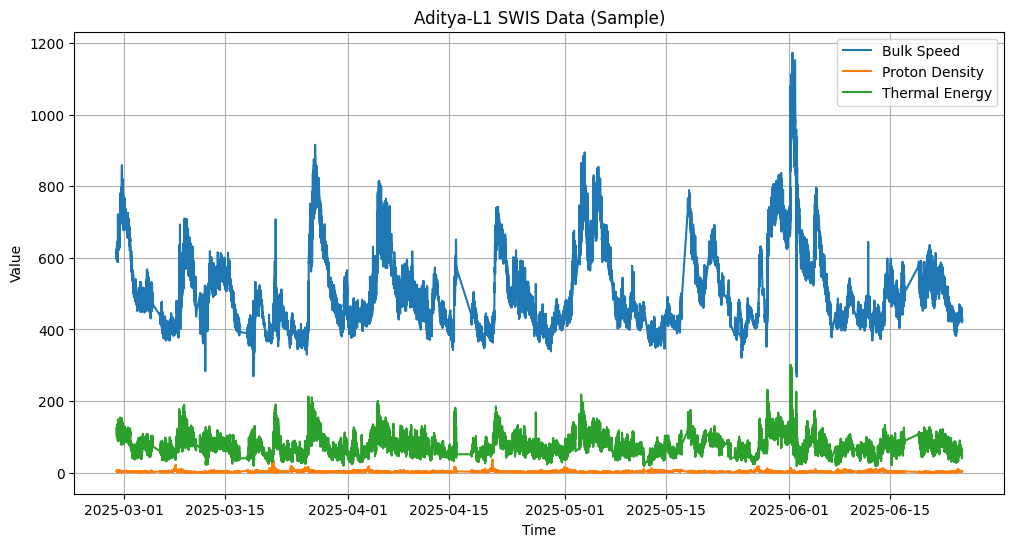

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['speed'], label='Bulk Speed')
plt.plot(df['time'], df['density'], label='Proton Density')
plt.plot(df['time'], df['thermal'], label='Thermal Energy')
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Aditya-L1 SWIS Data (Sample)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
df['speed_smooth'] = df['speed'].rolling(window=15).mean()
df['density_smooth'] = df['density'].rolling(window=15).mean()
df['thermal_smooth'] = df['thermal'].rolling(window=15).mean()

In [7]:
df['speed_grad'] = df['speed'].diff()
df['density_grad'] = df['density'].diff()
df['thermal_grad'] = df['thermal'].diff()

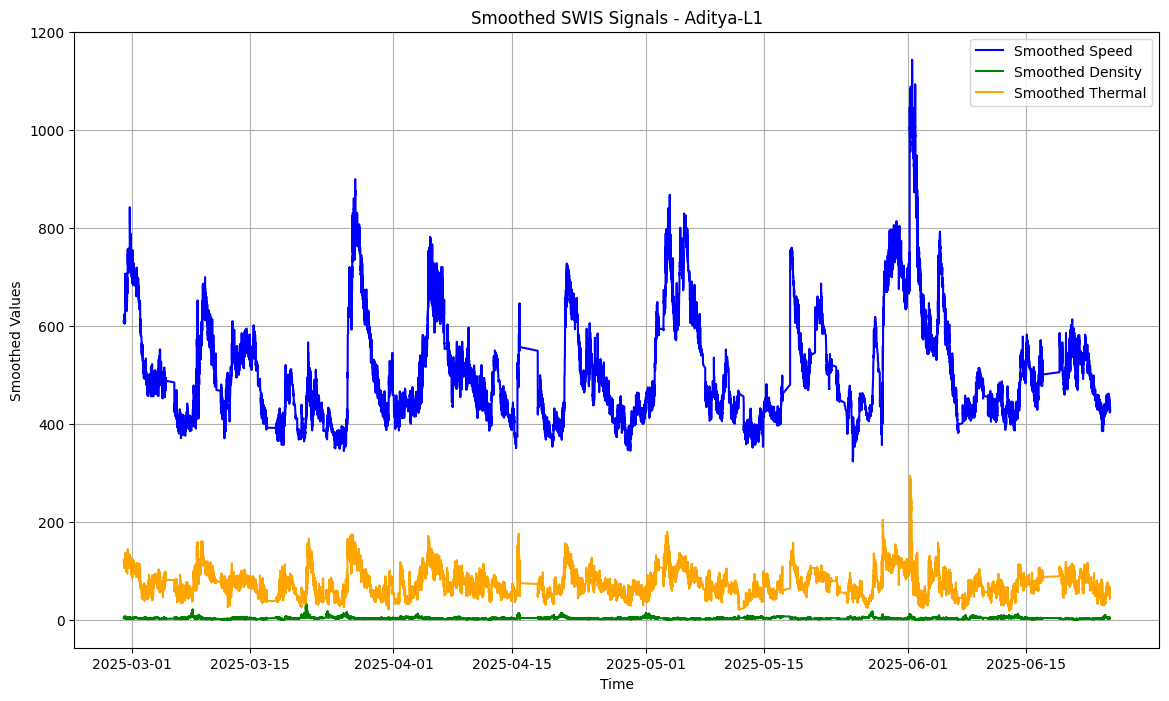

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(df['time'], df['speed_smooth'], label='Smoothed Speed', color='blue')
plt.plot(df['time'], df['density_smooth'], label='Smoothed Density', color='green')
plt.plot(df['time'], df['thermal_smooth'], label='Smoothed Thermal', color='orange')

plt.xlabel("Time")
plt.ylabel("Smoothed Values")
plt.title("Smoothed SWIS Signals - Aditya-L1")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
df['speed_grad'] = df['speed_smooth'].diff()
df['density_grad'] = df['density_smooth'].diff()
df['thermal_grad'] = df['thermal_smooth'].diff()

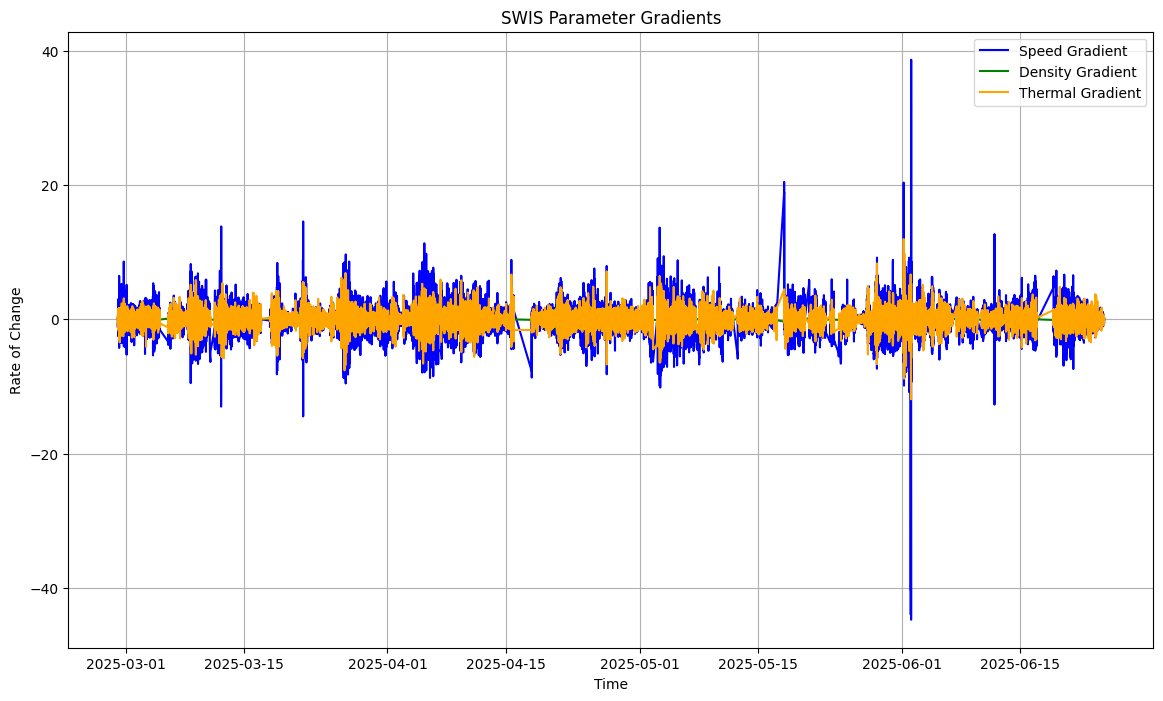

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

plt.plot(df['time'], df['speed_grad'], label='Speed Gradient', color='blue')
plt.plot(df['time'], df['density_grad'], label='Density Gradient', color='green')
plt.plot(df['time'], df['thermal_grad'], label='Thermal Gradient', color='orange')

plt.xlabel("Time")
plt.ylabel("Rate of Change")
plt.title("SWIS Parameter Gradients")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
speed_thresh = df['speed_grad'].std() * 2  # 2-sigma
density_thresh = df['density_grad'].std() * 2
thermal_thresh = df['thermal_grad'].std() * 2

df['anomaly_flag'] = (
    (df['speed_grad'].abs() > speed_thresh) |
    (df['density_grad'].abs() > density_thresh) |
    (df['thermal_grad'].abs() > thermal_thresh)
)


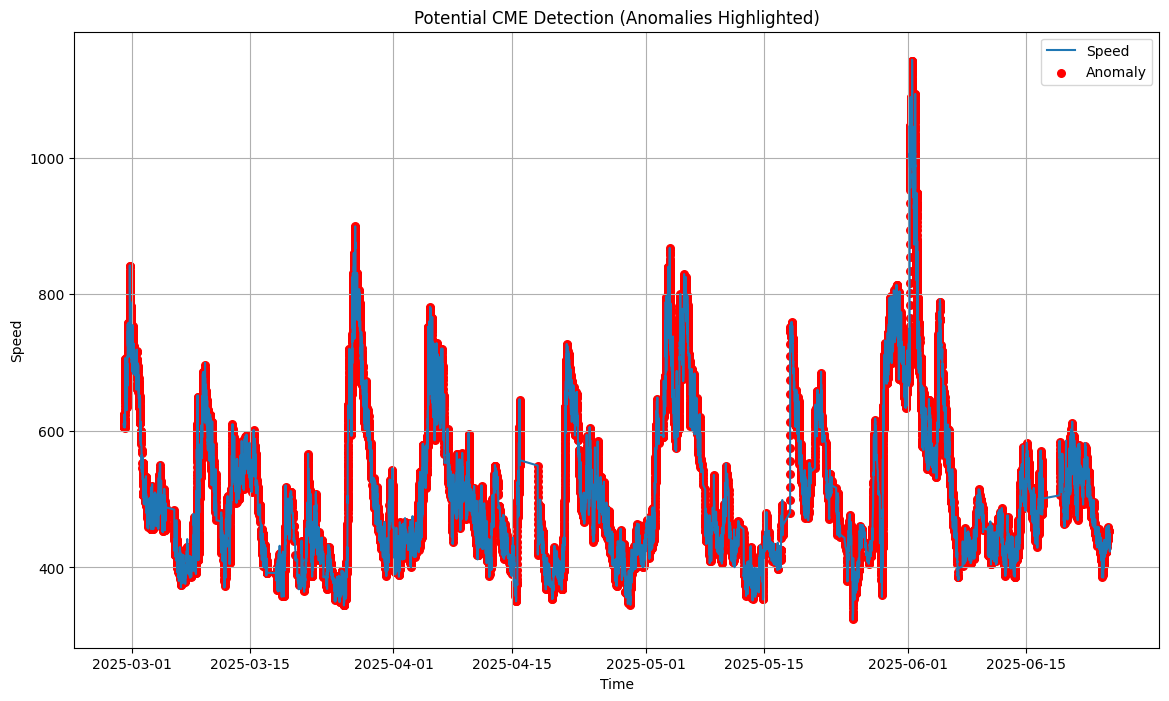

In [12]:
anomaly_points = df[df['anomaly_flag']]

plt.figure(figsize=(14, 8))
plt.plot(df['time'], df['speed_smooth'], label='Speed')
plt.scatter(anomaly_points['time'], anomaly_points['speed_smooth'], color='red', label='Anomaly', s=30)
plt.xlabel("Time")
plt.ylabel("Speed")
plt.title("Potential CME Detection (Anomalies Highlighted)")
plt.legend()
plt.grid(True)
plt.show()


In [13]:
#### For One CACTUS html file

# import pandas as pd
# import requests

# url = "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2024/05/latestCMEs.html"
# response = requests.get(url)
# lines = response.text.split("\n")

# # Locate the line that contains column headers
# header_line = next(line for line in lines if line.startswith('# CME'))
# headers = [h.strip() for h in header_line[1:].split('|')]

# # Extract data rows
# data_lines = [line.strip().split('|') for line in lines
#               if line.strip() and not line.startswith('#') and '|' in line]

# # Create DataFrame
# cme_df = pd.DataFrame(data_lines, columns=headers)

# # Clean whitespace
# cme_df = cme_df.apply(lambda col: col.str.strip())

# # Convert time column to datetime
# if 't0' in cme_df.columns:
#     cme_df['datetime'] = pd.to_datetime(cme_df['t0'], errors='coerce')



#### For Multiple CACTUS html files
import pandas as pd
import requests

# 🔗 List of CACTUS URLs to combine
urls = [
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/01/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/02/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/03/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/04/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/05/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/06/latestCMEs.html",
]

all_data = []

for url in urls:
    try:
        response = requests.get(url)
        lines = response.text.split("\n")

        # Locate the header line
        header_line = next(line for line in lines if line.startswith('# CME'))
        headers = [h.strip() for h in header_line[1:].split('|')]

        # Get data lines (skip comments and blanks)
        data_lines = [line.strip().split('|') for line in lines
                      if line.strip() and not line.startswith('#') and '|' in line]

        # Build temporary DataFrame
        df = pd.DataFrame(data_lines, columns=headers)

        # Clean whitespace
        df = df.apply(lambda col: col.str.strip())

        # Add datetime column
        if 't0' in df.columns:
            df['datetime'] = pd.to_datetime(df['t0'], errors='coerce')

        all_data.append(df)

        print(f"Loaded data from {url} | Records: {len(df)}")

    except Exception as e:
        print(f"Failed to load from {url} | Error: {e}")

# Combine all monthly data into one
cme_df = pd.concat(all_data, ignore_index=True)

# Final result
print(f"\nCombined CME entries: {len(cme_df)}")
print(cme_df[['datetime', 'CME', 'v']].head())


Loaded data from https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/01/latestCMEs.html | Records: 194
Loaded data from https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/02/latestCMEs.html | Records: 171
Loaded data from https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/03/latestCMEs.html | Records: 185
Loaded data from https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/04/latestCMEs.html | Records: 199
Loaded data from https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/05/latestCMEs.html | Records: 192
Loaded data from https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/06/latestCMEs.html | Records: 138

Combined CME entries: 1079
             datetime                                                CME     v
0 2025-01-31 23:24:00  <a href="CME0173/CME.html" target="_blank" >01...  0251
1 2025-01-31 17:00:00  <a href="CME0172/CME.html" target="_blank" >01...  0381
2 2025-01-31 17:00:00  <a href="CME0171/CME.html" target="_blank" >01...  0219
3 2025-01-31 1

In [14]:
print(cme_df[['datetime']].dropna().head())
print("Total valid CME events:", len(cme_df))


             datetime
0 2025-01-31 23:24:00
1 2025-01-31 17:00:00
2 2025-01-31 17:00:00
3 2025-01-31 14:24:00
4 2025-01-31 14:24:00
Total valid CME events: 1079


In [15]:
if 'halo?' in cme_df.columns:
    halo_df = cme_df[cme_df['halo?'].str.contains('Y', na=False)]


In [16]:
print(cme_df.columns.tolist())
print(cme_df.head())

['CME', 't0', 'dt0', 'pa', 'da', 'v', 'dv', 'minv', 'maxv', 'halo?', 'datetime']
                                                 CME                t0 dt0  \
0  <a href="CME0173/CME.html" target="_blank" >01...  2025/01/31 23:24  01   
1  <a href="CME0172/CME.html" target="_blank" >01...  2025/01/31 17:00  00   
2  <a href="CME0171/CME.html" target="_blank" >01...  2025/01/31 17:00  01   
3  <a href="CME0170/CME.html" target="_blank" >01...  2025/01/31 14:24  03   
4  <a href="CME0169/CME.html" target="_blank" >01...  2025/01/31 14:24  02   

    pa   da     v    dv  minv  maxv halo?            datetime  
0  249  032  0251  0087  0188  0442       2025-01-31 23:24:00  
1  235  008  0381  0039  0323  0437       2025-01-31 17:00:00  
2  279  008  0219  0029  0172  0254       2025-01-31 17:00:00  
3  047  048  0299  0092  0151  0538       2025-01-31 14:24:00  
4  079  112  0294  0069  0178  0446    II 2025-01-31 14:24:00  


In [17]:
import pandas as pd
import numpy as np

# Path to the combined CSV file
# csv_path = "C:\\Users\\ANGSHUMOY\\Downloads\\BAHack\\swis_combined.csv"


df = pd.read_csv("swis_combined_all_days.csv", parse_dates=["time"])


# Load CSV
# df = pd.read_csv(csv_path, parse_dates=['time'])

# Clean data
df.replace(-1.0e31, np.nan, inplace=True)
df.dropna(inplace=True)

# Smoothing
df['speed_smooth'] = df['speed'].rolling(window=15, center=True).mean()
df['density_smooth'] = df['density'].rolling(window=15, center=True).mean()
df['thermal_smooth'] = df['thermal'].rolling(window=15, center=True).mean()

# Gradient-based anomaly detection
df['speed_grad'] = df['speed_smooth'].diff()
threshold = df['speed_grad'].std() * 2
df['anomaly_flag'] = df['speed_grad'].abs() > threshold

# Output
print("Combined CSV processed and anomalies detected.")
print(df[['time', 'speed_smooth', 'anomaly_flag']].head())


Combined CSV processed and anomalies detected.
                     time  speed_smooth  anomaly_flag
0 2025-02-28 00:00:28.688           NaN         False
1 2025-02-28 00:00:33.688           NaN         False
2 2025-02-28 00:00:38.688           NaN         False
3 2025-02-28 00:00:43.688           NaN         False
4 2025-02-28 00:00:48.688           NaN         False


In [18]:
swis_start = df['time'].min()
swis_end = df['time'].max()


In [19]:
swis_start = df['time'].min()
swis_end = df['time'].max()

# Use filtered cme_df (you already have this from before)
cme_df_filtered = cme_df[
    (cme_df['datetime'] >= swis_start - pd.Timedelta(days=1)) &
    (cme_df['datetime'] <= swis_end + pd.Timedelta(days=1))
].copy()

print("Filtered CACTus Events:")
print(cme_df_filtered[['datetime', 'v', 'halo?']])


Filtered CACTus Events:
                datetime     v halo?
194  2025-02-28 19:12:00  1812      
195  2025-02-28 18:00:00  0459      
196  2025-02-28 17:24:00  0304      
197  2025-02-28 17:12:00  1157    II
198  2025-02-28 02:24:00  0208      
...                  ...   ...   ...
1074 2025-06-08 17:12:00  1953      
1075 2025-06-08 12:48:00  0372      
1076 2025-06-05 06:48:00  0411      
1077 2025-06-03 07:54:00  0167      
1078 2025-06-03 02:48:00  0113      

[729 rows x 3 columns]


In [20]:
from datetime import timedelta

df['confirmed_cme'] = False

for i, row in df[df['anomaly_flag']].iterrows():
    for event_time in cme_df_filtered['datetime']:
        if abs(row['time'] - event_time) <= timedelta(hours=2):
            df.at[i, 'confirmed_cme'] = True
            break


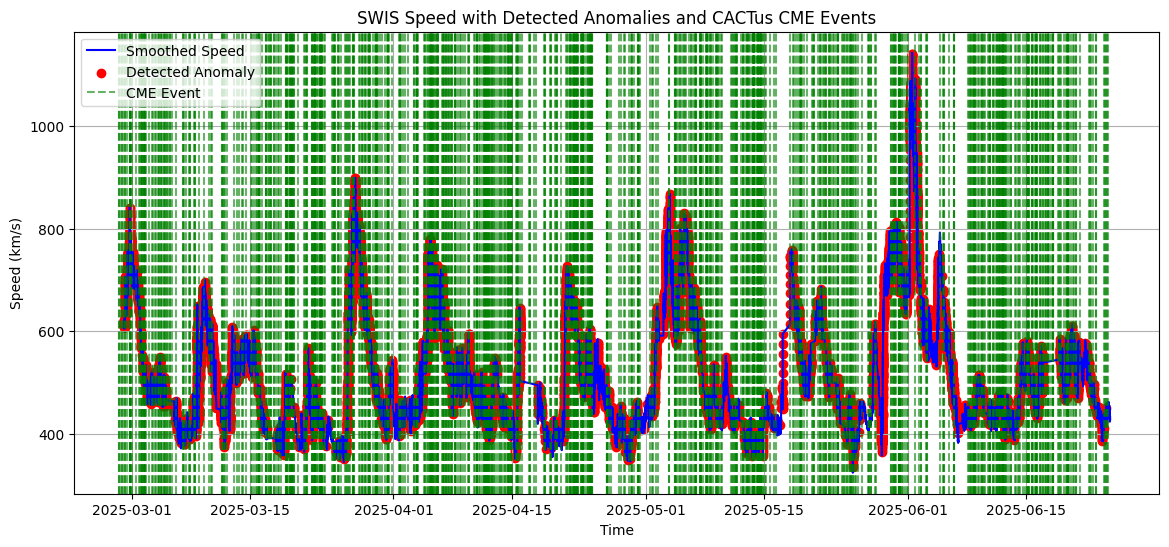

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot smoothed speed
plt.plot(df['time'], df['speed_smooth'], label='Smoothed Speed', color='blue')

# Red dots for detected anomalies
plt.scatter(df[df['anomaly_flag']]['time'],
            df[df['anomaly_flag']]['speed_smooth'],
            color='red', label='Detected Anomaly')

# Green lines for CACTus CME events
for i, t in enumerate(cme_df_filtered['datetime']):
    if i == 0:
        plt.axvline(t, color='green', linestyle='--', alpha=0.6, label='CME Event')
    else:
        plt.axvline(t, color='green', linestyle='--', alpha=0.6)

plt.xlabel("Time")
plt.ylabel("Speed (km/s)")
plt.title("SWIS Speed with Detected Anomalies and CACTus CME Events")
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# tp = df['confirmed_cme'].sum()
# fp = df['anomaly_flag'].sum() - tp
# fn = len(cme_df_filtered) - tp  # crude FN estimate

tp = df[df['anomaly_flag'] & df['confirmed_cme']].shape[0]
fp = df[df['anomaly_flag'] & ~df['confirmed_cme']].shape[0]
fn = len(cme_df_filtered) - tp if len(cme_df_filtered) > tp else 0


print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")


True Positives: 19506
False Positives: 14218
False Negatives: 0


In [23]:
import pandas as pd
import numpy as np

# # Load your preprocessed combined CSV file
# csv_path = "C:\\Users\\ANGSHUMOY\\Downloads\\BAHack\\swis_combined.csv"
# df = pd.read_csv(csv_path, parse_dates=['time'])


df = pd.read_csv("swis_combined_all_days.csv", parse_dates=["time"])

# Clean missing/fill values
df.replace(-1.0e31, np.nan, inplace=True)
df.dropna(inplace=True)

# Apply rolling smoothing to the speed signal
df['speed_smooth'] = df['speed'].rolling(window=15, center=True).mean()

# Compute gradient (difference between consecutive smoothed values)
df['speed_grad'] = df['speed_smooth'].diff()

# Set a dynamic anomaly threshold based on std deviation of gradients
threshold = df['speed_grad'].std() * 2
df['anomaly_flag'] = df['speed_grad'].abs() > threshold

# Save the anomaly-marked data
df.to_csv("swis_with_anomalies.csv", index=False)

# Print
print("Combined CSV processed and anomalies detected.")
print(df[['time', 'speed_smooth', 'anomaly_flag']].head())


Combined CSV processed and anomalies detected.
                     time  speed_smooth  anomaly_flag
0 2025-02-28 00:00:28.688           NaN         False
1 2025-02-28 00:00:33.688           NaN         False
2 2025-02-28 00:00:38.688           NaN         False
3 2025-02-28 00:00:43.688           NaN         False
4 2025-02-28 00:00:48.688           NaN         False


In [24]:
import pandas as pd
import requests

# CACTUS CME event URLs
urls = [
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/01/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/02/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/03/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/04/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/05/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/06/latestCMEs.html",
]

all_data = []

for url in urls:
    try:
        response = requests.get(url)
        lines = response.text.split("\n")

        # Locate header line
        header_line = next(line for line in lines if line.startswith('# CME'))
        headers = [h.strip() for h in header_line[1:].split('|')]

        # Extract data lines
        data_lines = [line.strip().split('|') for line in lines
                      if line.strip() and not line.startswith('#') and '|' in line]

        df = pd.DataFrame(data_lines, columns=headers)
        df = df.apply(lambda col: col.str.strip())

        # Add datetime column
        df['datetime'] = pd.to_datetime(df['t0'], errors='coerce')

        all_data.append(df)
        print(f"Loaded data from: {url} | Entries: {len(df)}")

    except Exception as e:
        print(f"Failed to load from: {url} | Error: {e}")

# Combine all months into one DataFrame
cme_df = pd.concat(all_data, ignore_index=True)

# Final Output
print(f"\nCombined CME entries: {len(cme_df)}")
print(cme_df[['datetime', 'CME', 'v']].head())


Loaded data from: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/01/latestCMEs.html | Entries: 194
Loaded data from: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/02/latestCMEs.html | Entries: 171
Loaded data from: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/03/latestCMEs.html | Entries: 185
Loaded data from: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/04/latestCMEs.html | Entries: 199
Loaded data from: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/05/latestCMEs.html | Entries: 192
Loaded data from: https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/06/latestCMEs.html | Entries: 138

Combined CME entries: 1079
             datetime                                                CME     v
0 2025-01-31 23:24:00  <a href="CME0173/CME.html" target="_blank" >01...  0251
1 2025-01-31 17:00:00  <a href="CME0172/CME.html" target="_blank" >01...  0381
2 2025-01-31 17:00:00  <a href="CME0171/CME.html" target="_blank" >01...  0219
3 2025-0

In [25]:
# Get time range of SWIS data
print(df.columns.tolist())
swis_df = pd.read_csv("swis_combined_all_days.csv", parse_dates=["time"])

swis_start = swis_df['time'].min()
swis_end = swis_df['time'].max()

cme_df_filtered = cme_df[
    (cme_df['datetime'] >= swis_start - pd.Timedelta(days=1)) &
    (cme_df['datetime'] <= swis_end + pd.Timedelta(days=1))
].copy()

print(f"\n Filtered CACTUS events: {len(cme_df_filtered)}")
print(cme_df_filtered[['datetime', 'v', 'halo?']].head())


['CME', 't0', 'dt0', 'pa', 'da', 'v', 'dv', 'minv', 'maxv', 'halo?', 'datetime']

 Filtered CACTUS events: 729
               datetime     v halo?
194 2025-02-28 19:12:00  1812      
195 2025-02-28 18:00:00  0459      
196 2025-02-28 17:24:00  0304      
197 2025-02-28 17:12:00  1157    II
198 2025-02-28 02:24:00  0208      


In [26]:
swis_df = pd.read_csv("swis_combined_all_days.csv", parse_dates=["time"])

swis_df['speed_smooth'] = swis_df['speed'].rolling(window=15, center=True).mean()
swis_df['speed_grad'] = swis_df['speed_smooth'].diff()
threshold = swis_df['speed_grad'].std() * 2
swis_df['anomaly_flag'] = swis_df['speed_grad'].abs() > threshold

from datetime import timedelta

swis_df['confirmed_cme'] = False

for i, row in swis_df[swis_df['anomaly_flag']].iterrows():
    for event_time in cme_df_filtered['datetime']:
        if pd.notnull(row['time']) and pd.notnull(event_time):
            if abs(row['time'] - event_time) <= timedelta(hours=2):
                swis_df.at[i, 'confirmed_cme'] = True
                break


In [27]:
# Use DataFrame name
tp = swis_df[swis_df['anomaly_flag'] & swis_df['confirmed_cme']].shape[0]
fp = swis_df[swis_df['anomaly_flag'] & ~swis_df['confirmed_cme']].shape[0]
fn = len(cme_df_filtered) - tp if len(cme_df_filtered) > tp else 0

# Metrics
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Output
print(f" Precision: {precision:.2f}")
print(f" Recall: {recall:.2f}")
print(f" F1-Score: {f1:.2f}")


 Precision: 0.58
 Recall: 1.00
 F1-Score: 0.73


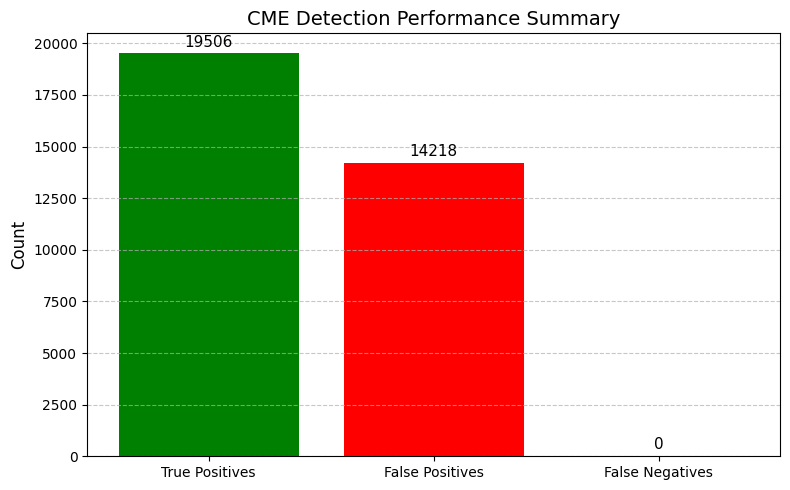

In [28]:
import matplotlib.pyplot as plt

# Data
metrics = ['True Positives', 'False Positives', 'False Negatives']
values = [19506, 14218, 0]
colors = ['green', 'red', 'orange']

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=colors)
plt.title("CME Detection Performance Summary", fontsize=14)
plt.ylabel("Count", fontsize=12)

# Annotate each bar
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
from datetime import timedelta
import requests

#Load Combined CSV
df = pd.read_csv("C:\\Users\\ANGSHUMOY\\Downloads\\B_A_Hackathon For GitHub\\CME-Detection\\swis_combined_all_days.csv", parse_dates=['time'])
df.replace(-1.0e31, np.nan, inplace=True)
df.dropna(inplace=True)

#Anomaly Detection
df['speed_smooth'] = df['speed'].rolling(window=15, center=True).mean()
df['speed_grad'] = df['speed_smooth'].diff()
threshold = df['speed_grad'].std() * 2
df['anomaly_flag'] = df['speed_grad'].abs() > threshold

#CACTUS Urls
cactus_urls = [
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/01/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/02/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/03/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/04/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/05/latestCMEs.html",
    "https://www.sidc.be/cactus/catalog/LASCO/2_5_0/qkl/2025/06/latestCMEs.html",
]

##ProcesS the Urls
cme_dfs = []

for url in cactus_urls:
    try:
        response = requests.get(url)
        lines = response.text.split("\n")
        header_line = next(line for line in lines if line.startswith('# CME'))
        headers = [h.strip() for h in header_line[1:].split('|')]
        data_lines = [line.strip().split('|') for line in lines if line.strip() and not line.startswith('#') and '|' in line]
        
        cme_df = pd.DataFrame(data_lines, columns=headers)
        cme_df = cme_df.apply(lambda col: col.str.strip())
        cme_df['datetime'] = pd.to_datetime(cme_df['t0'], errors='coerce')
        cme_dfs.append(cme_df)
    except Exception as e:
        print(f"⚠️ Failed to load {url}: {e}")

#Combine all files
cme_df_all = pd.concat(cme_dfs, ignore_index=True)

#Filter CME Data
swis_start = df['time'].min()
swis_end = df['time'].max()
cme_df_filtered = cme_df_all[
    (cme_df_all['datetime'] >= swis_start - pd.Timedelta(days=1)) &
    (cme_df_all['datetime'] <= swis_end + pd.Timedelta(days=1))
].copy()

# Match Anomalies
df['confirmed_cme'] = False
for i, row in df[df['anomaly_flag']].iterrows():
    for event_time in cme_df_filtered['datetime']:
        if pd.notnull(row['time']) and pd.notnull(event_time):
            if abs(row['time'] - event_time) <= timedelta(hours=2):
                df.at[i, 'confirmed_cme'] = True
                break

# Save the Output to:
df.to_csv("swis_with_anomalies_and_matches_new.csv", index=False)
cme_df_filtered.to_csv("cactus_cme_filtered_new.csv", index=False)

print("All done! Anomalies matched with CME events from multiple URLs.")


All done! Anomalies matched with CME events from multiple URLs.
